In [1]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [1]:
!pwd

/home/jupyter/sign_language_gesture_recognition


In [7]:
! chmod 600 /home/jupyter/sign_language_gesture_recognition/kaggle.json

In [3]:
import os

In [4]:
os.environ['KAGGLE_CONFIG_DIR'] = '/home/jupyter/sign_language_gesture_recognition'

In [5]:
import kaggle

In [6]:
!kaggle datasets download -d risangbaskoro/wlasl-processed

100%|█████████████████████████████████████▉| 4.82G/4.82G [02:25<00:00, 16.4MB/s]
100%|██████████████████████████████████████| 4.82G/4.82G [02:25<00:00, 35.6MB/s]


In [65]:
# unzip
import zipfile, os

path_to_zip = '/home/jupyter/sign_language_gesture_recognition/wlasl-processed.zip'
dst_path = '/home/jupyter/sign_language_gesture_recognition/dataset'

if not os.path.exists(dst_path):
  os.makedirs(dst_path)
  with zipfile.ZipFile(path_to_zip, 'r') as file:
    file.extractall(dst_path)

In [66]:
import pandas as pd
wlas_df = pd.read_json(os.path.join(dst_path,'WLASL_v0.3.json'))

In [67]:
print(wlas_df)

           gloss                                          instances
0           book  [{'bbox': [385, 37, 885, 720], 'fps': 25, 'fra...
1          drink  [{'bbox': [551, 68, 1350, 1080], 'fps': 25, 'f...
2       computer  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...
3         before  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...
4          chair  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...
...          ...                                                ...
1995  washington  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...
1996   waterfall  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...
1997       weigh  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...
1998  wheelchair  [{'bbox': [415, 86, 1811, 1080], 'fps': 25, 'f...
1999     whistle  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...

[2000 rows x 2 columns]


In [68]:
def get_videos_ids(json_list):
    """
    function to check if the video id is available in the dataset
    and return the viedos ids of the current instance
    
    input: instance json list
    output: list of videos_ids
    
    """
    videos_list = []    
    for ins in json_list:
        video_id = ins['video_id']
        if os.path.exists(f'/home/jupyter/sign_language_gesture_recognition/dataset/videos/{video_id}.mp4'):
            videos_list.append(video_id)
    return videos_list

In [69]:
def get_json_features(json_list):
    """
    function to check if the video id is available in the dataset
    and return the viedos ids and url or any other featrue of the current instance
    
    input: instance json list
    output: list of videos_ids
    
    """
    videos_ids = []
    for ins in json_list:
        video_id = ins['video_id']
        if os.path.exists(f'/home/jupyter/sign_language_gesture_recognition/dataset/videos/{video_id}.mp4'):
            videos_ids.append(video_id)
    return videos_ids

In [70]:
wlas_df['videos_ids'] = wlas_df['instances'].apply(get_videos_ids)

In [71]:
wlas_df

,gloss,instances,videos_ids
0,book,"[{'bbox': [385, 37, 885, 720], 'fps': 25, 'fra...","[69241, 07069, 07068, 07070, 07099, 07074]"
1,drink,"[{'bbox': [551, 68, 1350, 1080], 'fps': 25, 'f...","[69302, 65539, 17710, 17733, 65540, 17734, 177..."
2,computer,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...","[12328, 12312, 12311, 12338, 12313, 12314, 123..."
3,before,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...","[05728, 05749, 05750, 05729, 05730, 65167, 057..."
4,chair,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...","[09848, 09869, 09849, 09850, 09851, 65328, 09854]"
...,...,...,...
1995,washington,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...","[62393, 62394, 62395, 62396, 62398]"
1996,waterfall,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...","[62488, 62489, 62490, 62492, 62493]"
1997,weigh,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...","[62782, 62783, 62785]"
1998,wheelchair,"[{'bbox': [415, 86, 1811, 1080], 'fps': 25, 'f...","[63044, 63046, 63047, 63050]"


In [34]:
features_df = pd.DataFrame(columns=['gloss', 'video_id'])
for row in wlas_df.iterrows():
#     print(row[1][1])
    ids = get_json_features(row[1][1])
    word = [row[1][0]] * len(ids)
    df = pd.DataFrame(list(zip(word, ids)), columns = features_df.columns)
    features_df = features_df.append(df, ignore_index=True)

In [35]:
features_df

,gloss,video_id
0,book,69241
1,book,07069
2,book,07068
3,book,07070
4,book,07099
...,...,...
11975,wheelchair,63047
11976,wheelchair,63050
11977,whistle,63186
11978,whistle,63188


In [36]:
features_df.to_csv('features_df.csv', index=False)

Dataset analysis

In [37]:
wlas_df['samples_num'] = wlas_df['videos_ids'].apply(len)

In [38]:
words_sample_counts = wlas_df[['gloss', 'samples_num']].groupby('samples_num').agg({"gloss":['count', ', '.join]})

In [39]:
words_sample_counts

gloss                                                   
            count                                               join
samples_num                                                         
2              14  gloves, careless, wash face, curtain, grey, la...
3              76  garage, parents, boots, excuse, furniture, rep...
4             335  hello, newspaper, asl, that, will, cards, hate...
5             511  clothes, table, movie, clock, pencil, behind, ...
6             402  book, birthday, need, have, knife, read, name,...
7             307  chair, dance, eat, forget, but, jacket, paint,...
8             151  all, blue, hearing, wrong, color, enjoy, time,...
9             100  fine, finish, now, can, hat, kiss, cow, meet, ...
10             48  year, black, hot, like, many, orange, fish, gr...
11             26  deaf, no, walk, mother, woman, dog, family, ap...
12             13  yes, what, later, man, shirt, change, corn, da...
13              8  candy, thanksgiving, bed, bowling, tall, accid...
14              4                        computer, who, cousin, help
15              2                                          drink, go
16              3                                 before, thin, cool

In [70]:
bins = [i for i in range(2,17)]

In [71]:
counts = [14, 76, 335, 511, 402, 307, 151, 100, 48, 26, 13, 8, 4, 2, 3]

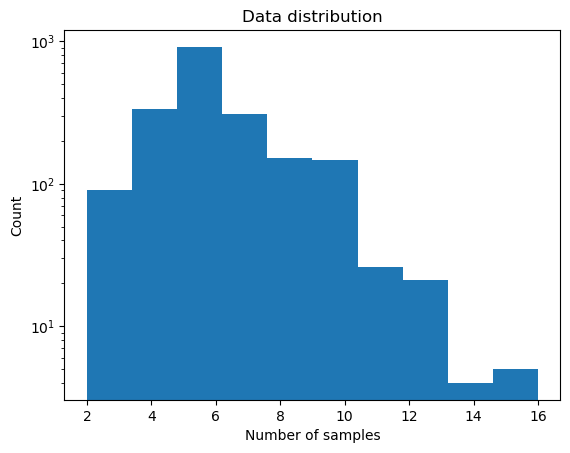

In [78]:
import matplotlib.pyplot as plt
plt.hist(bins, weights=counts, log=True)
plt.ylabel('Count')
plt.xlabel('Number of samples')
plt.title('Data distribution')
plt.show()

# Feature extraction based on [source](https://www.youtube.com/watch?v=doDUihpj6ro)

Virtual environment setup

In [31]:
conda create -y --name asl

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/asl



Preparing transaction: done
Verifying transaction: done
Executing transaction: done
#
# To activate this environment, use
#
#     $ conda activate asl
#
# To deactivate an active environment, use
#
#     $ conda deactivate

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [2]:
ls -l /opt/conda/envs

total 4
drwxr-xr-x 3 jupyter jupyter 4096 Nov 26 14:23 asl/


In [3]:
%conda activate /opt/conda/envs/asl


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.



Note: you may need to restart the kernel to use updated packages.


In [1]:
conda --version

conda 22.9.0

Note: you may need to restart the kernel to use updated packages.


In [6]:
!python -m ipykernel install --user --name=asl

Installed kernelspec asl in /home/jupyter/.local/share/jupyter/kernels/asl


In [11]:
! conda env list

# conda environments:
#
base                  *  /opt/conda
asl                      /opt/conda/envs/asl



In [37]:
conda init --help

usage: conda init [-h] [--all] [--user] [--no-user] [--system] [--reverse]
                  [--json] [-v] [-q] [-d]
                  [shells [shells ...]]

Initialize conda for shell interaction.

Options:

positional arguments:
  shells         One or more shells to be initialized. If not given, the
                 default value is 'bash' on unix and 'cmd.exe' on Windows. Use
                 the '--all' flag to initialize all shells. Currently
                 compatible shells are {bash, fish, powershell, tcsh, xonsh,
                 zsh}.

optional arguments:
  -h, --help     Show this help message and exit.
  --all          Initialize all currently available shells.
  -d, --dry-run  Only display what would have been done.

setup type:
  --user         Initialize conda for the current user (default).
  --no-user      Don't initialize conda for the current user (default).
  --system       Initialize conda for all users on the system.
  --reverse      Undo effects of last conda i

In [16]:
conda init bash

no change     /opt/conda/condabin/conda
no change     /opt/conda/bin/conda
no change     /opt/conda/bin/conda-env
no change     /opt/conda/bin/activate
no change     /opt/conda/bin/deactivate
no change     /opt/conda/etc/profile.d/conda.sh
no change     /opt/conda/etc/fish/conf.d/conda.fish
no change     /opt/conda/shell/condabin/Conda.psm1
no change     /opt/conda/shell/condabin/conda-hook.ps1
no change     /opt/conda/lib/python3.7/site-packages/xontrib/conda.xsh
no change     /opt/conda/etc/profile.d/conda.csh
no change     /home/jupyter/.bashrc
No action taken.

Note: you may need to restart the kernel to use updated packages.


In [20]:
%%bash
eval "$(conda shell.bash hook)" # copy conda command to shell
conda activate asl
conda env list

# conda environments:
#
base                     /opt/conda
asl                   *  /opt/conda/envs/asl



In [19]:
! conda env list

# conda environments:
#
base                  *  /opt/conda
asl                      /opt/conda/envs/asl



Google Cloud cannot into conda virtual environemtns...

https://stackoverflow.com/questions/62610289/conda-activate-and-conda-init-fail-to-work-in-colab-as-per-june-2020

In [21]:
pip install ffmpeg-python

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [24]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import mediapipe as mp

In [15]:
print(cv2.getBuildInformation())


General configuration for OpenCV 4.6.0 =====================================
  Version control:               unknown

  Extra modules:
    Location (extra):            /io/opencv_contrib/modules
    Version control (extra):     unknown

  Platform:
    Timestamp:                   2022-06-07T10:28:32Z
    Host:                        Linux 5.13.0-1025-azure x86_64
    CMake:                       3.22.5
    CMake generator:             Unix Makefiles
    CMake build tool:            /bin/gmake
    Configuration:               Release

  CPU/HW features:
    Baseline:                    SSE SSE2 SSE3
      requested:                 SSE3
    Dispatched code generation:  SSE4_1 SSE4_2 FP16 AVX AVX2 AVX512_SKX
      requested:                 SSE4_1 SSE4_2 AVX FP16 AVX2 AVX512_SKX
      SSE4_1 (16 files):         + SSSE3 SSE4_1
      SSE4_2 (1 files):          + SSSE3 SSE4_1 POPCNT SSE4_2
      FP16 (0 files):            + SSSE3 SSE4_1 POPCNT SSE4_2 FP16 AVX
      AVX (4 files):        

In [2]:
def video2frames(video_file_path):
    cap = cv2.VideoCapture(video_file_path)
    frame_rate = cap.get(5)
    while cap.isOpened():
        frame_id = cap.get(1)
        ret, frame = cap.read()
        if not ret:
            break
        if frame_id % math.floor(frame_rate) == 0:
            filename = '{}_frame_{}.jpg'.format(video_file_path, count)
            count += 1
            cv2.imwrite(filename, frame)
    cap.release()

videos = glob.glob('/home/adam/*.mp4')
for i, video in enumerate(videos):
    print('{}/{} - {}'.format(i+1, len(videos), video))
    video2frames(video)

NameError: name 'glob' is not defined

In [25]:
videos_path = '/home/jupyter/sign_language_gesture_recognition/dataset/videos/'

In [26]:
video_file_path = os.path.join(videos_path, '00335.mp4')

In [27]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [28]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [29]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)


In [30]:
def holistic_adnotation(file_path):
    frames = []
    holistics = []
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        cap = cv2.VideoCapture(file_path, cv2.CAP_FFMPEG)
        if not cap.isOpened():
            cap = cv2.VideoCapture(-1)
            if not cap.isOpened():
                raise IOError("Cannot open webcam")
            cap = cv2.VideoCapture(file_path, cv2.CAP_FFMPEG)
            if not cap.isOpened():
                raise IOError("Cannot open webcam")
                
        number_of_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
        for i in range(int(number_of_frames)):
            ret, frame = cap.read()
            if ret:
                image, results = mediapipe_detection(frame, holistic)
                frames.append(image)
                img_with_landmarks = image.copy()
                landmarks = draw_landmarks(img_with_landmarks, results)
                holistics.append(img_with_landmarks)
        cap.release()
        cv2.destroyAllWindows()
    frames = np.array(frames)
    holistics = np.array(holistics)
    return frames, holistics

In [31]:
frames, holistics = holistic_adnotation(video_file_path)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [32]:
frames.shape

(58, 240, 320, 3)

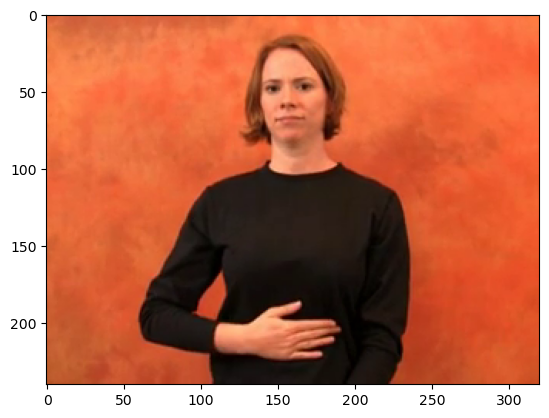

In [33]:
plt.imshow(frames[30,:,:,::-1])

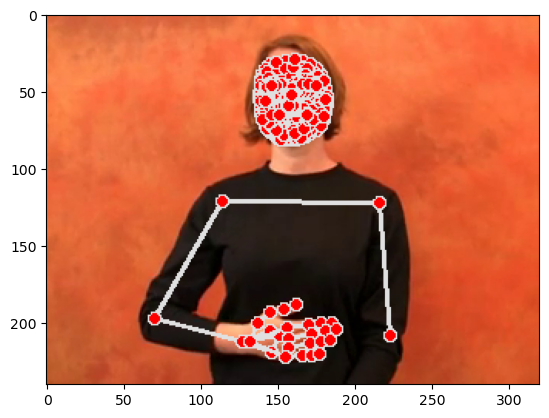

In [34]:
plt.imshow(holistics[30,:,:,::-1])

In [35]:
import pandas as pd
import os

features_path = '/home/jupyter/sign_language_gesture_recognition'
videos_path = '/home/jupyter/sign_language_gesture_recognition/dataset/videos/'
f_df = pd.read_csv(os.path.join(features_path, 'features_df.csv'))

In [39]:
for video_id in f_df[f_df['gloss']=='book'].video_id.to_list():
    video_id = str(video_id).zfill(5) # Files have 5 digits so if file id is 1000 we must pad to 01000
    video_file_path = os.path.join(videos_path, f'{video_id}.mp4')
    print(video_file_path)
    frames,_ = holistic_adnotation(video_file_path)
    print(frames.shape)

/home/jupyter/sign_language_gesture_recognition/dataset/videos/69241.mp4
(75, 720, 1280, 3)
/home/jupyter/sign_language_gesture_recognition/dataset/videos/07069.mp4
(30, 720, 1280, 3)
/home/jupyter/sign_language_gesture_recognition/dataset/videos/07068.mp4
(68, 414, 736, 3)
/home/jupyter/sign_language_gesture_recognition/dataset/videos/07070.mp4
(86, 480, 640, 3)
/home/jupyter/sign_language_gesture_recognition/dataset/videos/07099.mp4
(87, 400, 720, 3)
/home/jupyter/sign_language_gesture_recognition/dataset/videos/07074.mp4
(38, 192, 288, 3)


Problem is videos have different number of frames as well as screen resolution

https://keras.io/examples/vision/video_classification/
https://www.tensorflow.org/guide/data

In [138]:
def video_preprocessing(video, reshape=True, frames_limit=4, output_shape=(120,160)):
    no_frames = video.shape[0]
    print(no_frames)
    frames_selected = np.linspace(0,no_frames-1, frames_limit, dtype=int)
    print(frames_selected)
    interpolated_vid = video[frames_selected]
    if reshape:
        resized_vid = np.empty((frames_limit, *output_shape, 3), dtype=np.float32)
        for idx in range(frames_limit):
            res = cv2.resize(interpolated_vid[idx], (output_shape[1], output_shape[0]))
            res = cv2.cvtColor(res,cv2.COLOR_BGR2RGB)            
            resized_vid[idx] = res/255 # Int -> FLoat
        print(resized_vid.shape)
        return resized_vid
    return interpolated_vid

In [149]:
p_video = video_preprocessing(frames, False)

38
[ 0 12 24 37]


In [150]:
p_video.shape

(4, 192, 288, 3)

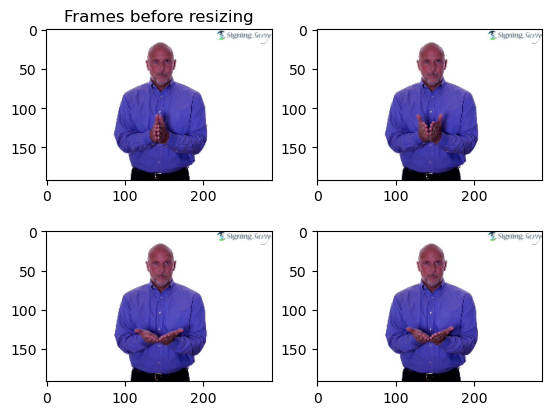

In [152]:
plt.subplot(2,2,1)
plt.title('Frames before resizing')
plt.imshow(cv2.cvtColor(p_video[0],cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.imshow(cv2.cvtColor(p_video[1],cv2.COLOR_BGR2RGB))
plt.subplot(2,2,3)
plt.imshow(cv2.cvtColor(p_video[2],cv2.COLOR_BGR2RGB))
plt.subplot(2,2,4)
plt.imshow(cv2.cvtColor(p_video[3],cv2.COLOR_BGR2RGB))
plt.show()

In [153]:
p_video = video_preprocessing(frames, True)

38
[ 0 12 24 37]
(4, 120, 160, 3)


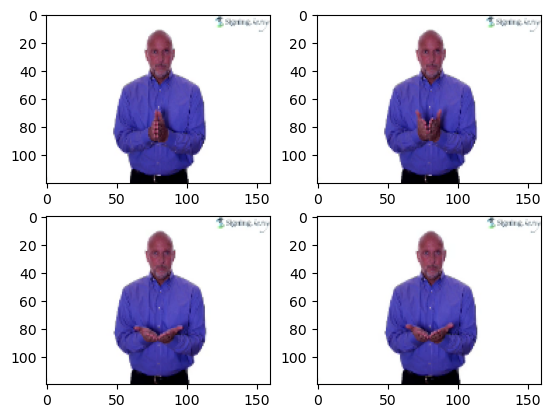

In [154]:
plt.title('Frames after resizing')
plt.subplot(2,2,1)
plt.imshow(p_video[0])
plt.subplot(2,2,2)
plt.imshow(p_video[1])
plt.subplot(2,2,3)
plt.imshow(p_video[2])
plt.subplot(2,2,4)
plt.imshow(p_video[3])
plt.show()

In [128]:
pip install imageio

Note: you may need to restart the kernel to use updated packages.


In [135]:
pip install animatplot

  Preparing metadata (setup.py) ... done
  Created wheel for animatplot: filename=animatplot-0.4.2-py3-none-any.whl size=16508 sha256=f9e0eaa25274132f07c9d927f31aabf75bed821ab37bfc57b1cfbd084251d859
  Stored in directory: /home/jupyter/.cache/pip/wheels/60/66/e0/92d7114687fdbf7e4ca93048ebd149911fa293ab59f17410d2
Successfully built animatplot
Note: you may need to restart the kernel to use updated packages.


In [136]:
import numpy as np
import matplotlib.pyplot as plt
import animatplot as amp

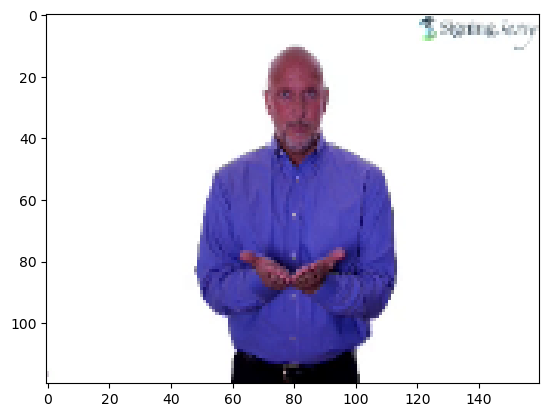

In [159]:
block = amp.blocks.Imshow(p_video)
anim = amp.Animation([block])
anim.save_gif('book')
plt.show()

In [156]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display

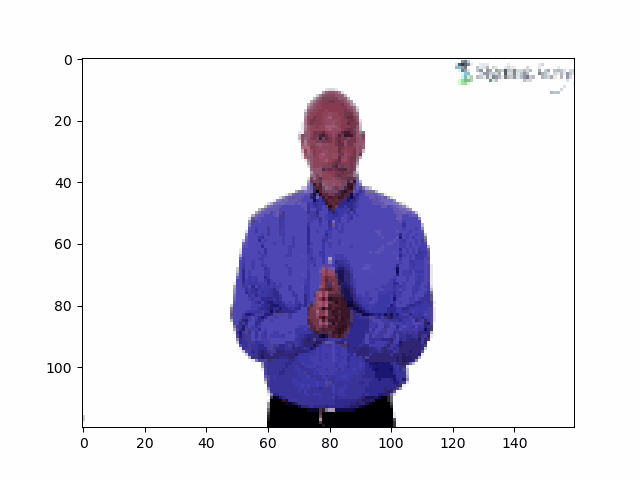

In [160]:
gifPath = "/home/jupyter/sign_language_gesture_recognition/book.gif" # please paste the whole path from Step 2-6
# Display GIF in Jupyter, CoLab, IPython
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')

NameError: name 'a' is not defined